## Utilisation de Pandas (Ressemble à excel mais beaucoup plus puissant et pratique)

### Objectif: Analyse des données du titanic
Analyse du dataset des passagers du titanic.
Dataset contenant les informations concernant les passagers à bord du navire (Le sexe, l'age, la classe, et l'information s'ils ont survécu ou non etc).

### Importation des librairies numpy, pandas pour la manipluation des données et matplotlib pour la visualisation des graphes

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importer le dataset (Format Excel)

In [71]:
titanic= pd.read_excel('titanic3.xls')

###  Verification de l'importation du dataset en ayant un aperçu des 3 premières lignes du tableau

In [74]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###  Dimensions de notre dataset

In [75]:
titanic.shape
print(titanic.shape)
print("Notre fichier excel importé contient 1309 lignes pour 1309 passagers et 14 colonnes")

(1309, 14)
Notre fichier excel importé contient 1309 lignes pour 1309 passagers et 14 colonnes


### Suppression des colonnes dont les données ne nous seront pas utiles pour notre analyse

In [76]:
titanic=titanic.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [77]:
#Au finale on a garder la classe, le sexe et l'âge des passagers

titanic.head(4)

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000


### Statistiques de base pour chacunes de nos colonnes

In [23]:
titanic.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


##### Observations:

### Elimination des lignes des données manquantes (valeurs manquantes)

In [78]:
titanic=titanic.dropna(axis=0)

In [79]:
#Vérification des dimensions de notre dataset avec les données supprimées

print("On peut voir que les dimensions sont maintenant de 1046 lignes et 4 colonnes")
print(titanic.shape)

On peut voir que les dimensions sont maintenant de 1046 lignes et 4 colonnes
(1046, 4)


##### Statistiques de notre nouveau dataset (colonne pclass, survived et age ont tous 1046 valeurs)

In [80]:
titanic.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


#### Observation:

### Affichage du nombre de survivant par classe

In [81]:
print("3ème classe: 501 survivants, 1ère classe: 284 et 2ème classe: 261")
print(titanic['pclass'].value_counts())

3ème classe: 501 survivants, 1ère classe: 284 et 2ème classe: 261
3    501
1    284
2    261
Name: pclass, dtype: int64


##### Affichage du nombre de survivant par classe avec un graphique

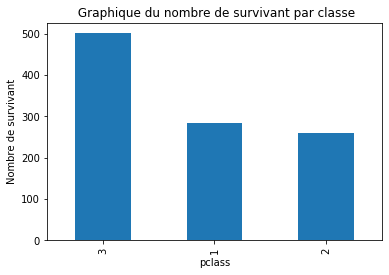

In [82]:
titanic['pclass'].value_counts().plot.bar()
plt.title(' Graphique du nombre de survivant par classe')
plt.xlabel('pclass')
plt.ylabel('Nombre de survivant')
plt.show()


### Répartition de l'age suivant un histographe

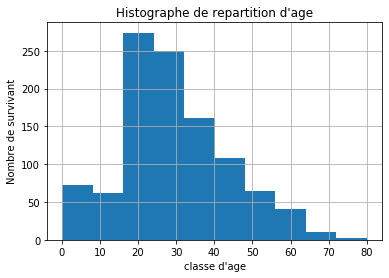

In [53]:
titanic['age'].hist()
plt.xlabel("classe d'age")
plt.ylabel("Nombre de survivant")
plt.title("Histographe de repartition d'age")
plt.show()

#### Observations: 

### On peut faire une analyse en regroupant les gens suivant leur sexe

In [83]:
titanic.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


#### Observations: 

In [86]:
# On peut aller plus loin en regroupant par sexe et par classe
titanic.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

#### Observations: 

In [87]:
#Regroupement de tout les passagers mineurs selon le sex et leur classe
titanic[titanic['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [88]:
#Affichage des mineurs par classe
titanic[titanic['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

# Conclusions:

Voila, quelques que fonctions de la librairie pandas, il est possible d'aller encore plus loin.
Ce travail est effectué dans Jupyter nootebook et le rendu des importations des tableaux sont beaucoup plus agréable à voir que la version convertie en pdf? qui ne laisse apparaître que les valeurs.
 de connaitre un peu plus sur les passagers du titanic, on pourrait aller encore plus loin.